# 하늘 위로 나는 것 같은, 천국을 연상케 하는 상승감, 꿈 속으로 빠지는 듯한 몽환적 느낌을 선사하는 곡

In [1]:
import librosa, librosa.display, librosa.feature
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import sklearn
hop_length = 200

In [2]:
"""
sound = AudioSegment.from_mp3("euphoria_inst.mp3")
sound.export("euphoria_inst.wav", format="wav")
sound = AudioSegment.from_mp3("fatherfigure_inst.mp3")
sound.export("fatherfigure_inst.wav", format="wav")
sound = AudioSegment.from_mp3("makemeloveyou_inst.mp3")
sound.export("makemeloveyou_inst.wav", format="wav")
sound = AudioSegment.from_mp3("view_inst.mp3")
sound.export("view_inst.wav", format="wav")
"""

'\nsound = AudioSegment.from_mp3("euphoria_inst.mp3")\nsound.export("euphoria_inst.wav", format="wav")\nsound = AudioSegment.from_mp3("fatherfigure_inst.mp3")\nsound.export("fatherfigure_inst.wav", format="wav")\nsound = AudioSegment.from_mp3("makemeloveyou_inst.mp3")\nsound.export("makemeloveyou_inst.wav", format="wav")\nsound = AudioSegment.from_mp3("view_inst.mp3")\nsound.export("view_inst.wav", format="wav")\n'

In [3]:
euph, sr = librosa.load('euphoria_inst.wav', sr=44100, offset=0.458, duration=4.258)
# that's all I wanted~
ff, sr = librosa.load('fatherfigure_inst.wav', sr=44100, offset=19.128, duration=9.279)
mmly, sr = librosa.load('makemeloveyou_inst.wav', sr=44100, offset=0.624, duration=10.465)
view, sr = librosa.load('view_inst.wav', sr=44100, offset=0.525, duration=7.773)

## Feature Extraction
### 1. Spectral features
#### 1) MFCC

In [4]:
def vector_split(v, n_split):
    v=np.array(v)
    length=len(v)//n_split
    res=[]
    for i in range(n_split-1):
        res.append(v[i*length:(i+1)*length])
    res.append(v[(i+1)*length:])
    return np.array(res)

def split_mean(v, n_split):
    splitted_vector=vector_split(v, n_split)
    res=[]
    for i in splitted_vector:
        res.append(i.mean())
    return np.array(res)

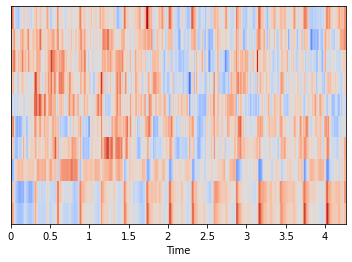

In [26]:
mfccs = librosa.feature.mfcc(euph, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [27]:
mfccs = librosa.feature.mfcc(euph, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)

[-135.72102    -12.636698    16.705881   -11.973541   -15.865867
  -24.508701   -12.324959    -6.066916   -14.061914    -0.4612169]


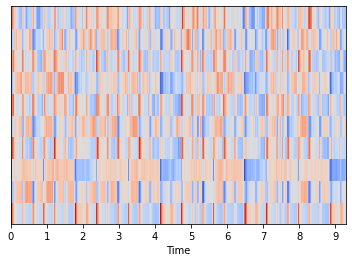

In [28]:
mfccs = librosa.feature.mfcc(ff, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [29]:
mfccs = librosa.feature.mfcc(ff, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)

[-104.40413      29.589289     16.241577      4.6750083     3.4086
   -0.34332693    1.3873236    -1.413382      1.5879828    -0.20342751]


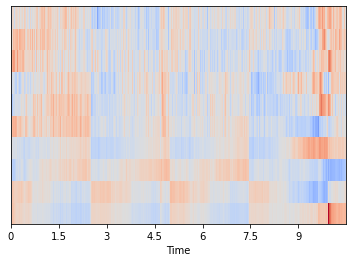

In [30]:
mfccs = librosa.feature.mfcc(mmly, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [31]:
mfccs = librosa.feature.mfcc(mmly, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)

[-9.1426659e+01  3.7602375e+01  9.0323162e+00  4.5516853e+00
  5.8730774e-02 -3.8210292e+00  2.1889613e+00  4.3635626e+00
  5.1380692e+00 -2.3610744e+00]


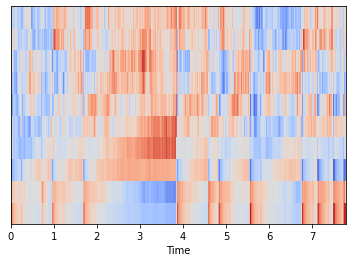

In [32]:
mfccs = librosa.feature.mfcc(view, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [33]:
mfccs = librosa.feature.mfcc(view, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)

[-128.32097     44.7783      -4.1326294   -8.610771    -6.831081
  -10.755214    -9.078145    -6.185634    -3.9184177   -5.5957675]


### 2) spectral centroid

In [7]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

[0.2952978679195997, 0.12615456766241417, 0.18351227021279323, 0.25840404955226276, 0.2789657305590591, 0.25643695966876884, 0.24574018726994332, 0.2873794456920747, 0.2437259391271336, 0.23192547011836478]


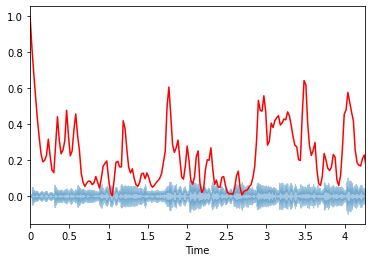

In [34]:
euph_sc = normalize(librosa.feature.spectral_centroid(euph,sr=sr)[0])
frames = range(len(euph_sc))
t = librosa.frames_to_time(frames)

euph_sc_data = split_mean(euph_sc,10)
print(list(euph_sc_data))
# normalize for visualization purposes
librosa.display.waveplot(euph,sr=sr,alpha=0.4)
plt.plot(t,euph_sc,color='r')

[0.20014059439584506, 0.18213967635427503, 0.20620613244147998, 0.2183951404134196, 0.2876851878788835, 0.28087122882836885, 0.2008557000794166, 0.31225696278775417, 0.28072337756470533, 0.2831344832661564]


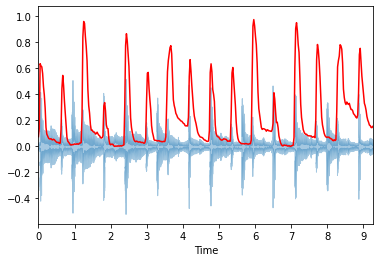

In [36]:
ff_sc = normalize(librosa.feature.spectral_centroid(ff,sr=sr)[0])
frames = range(len(ff_sc))
t = librosa.frames_to_time(frames)

ff_sc_data = split_mean(ff_sc,10)
print(list(ff_sc_data))
# normalize for visualization purposes
librosa.display.waveplot(ff,sr=sr,alpha=0.4)
plt.plot(t,ff_sc,color='r')

[0.0705294820270119, 0.025037026593137904, 0.04496094434313279, 0.05000317189544261, 0.02903261770259841, 0.047985997583119784, 0.03805912240597739, 0.06594929249082916, 0.14396891548762356, 0.17690150947996824]


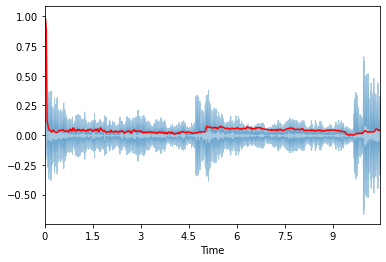

In [37]:
mmly_sc = normalize(librosa.feature.spectral_centroid(mmly,sr=sr)[0])
frames = range(len(mmly_sc))
t = librosa.frames_to_time(frames)

mmly_sc_data = split_mean(mmly_sc,10)
print(list(mmly_sc_data))
# normalize for visualization purposes
librosa.display.waveplot(mmly,sr=sr,alpha=0.4)
plt.plot(t,mmly_sc,color='r')

[0.42674663738143537, 0.2235354318646372, 0.14480998648251825, 0.10667304235977447, 0.11609183925623069, 0.1563348681093568, 0.22321996416813317, 0.3508611765683407, 0.3011110901026185, 0.3828379286487426]


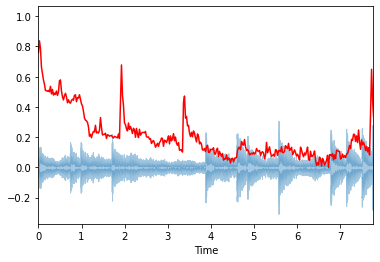

In [38]:
view_sc = normalize(librosa.feature.spectral_centroid(view,sr=sr)[0])
frames = range(len(view_sc))
t = librosa.frames_to_time(frames)

view_sc_data = split_mean(view_sc,10)
print(list(view_sc_data))
# normalize for visualization purposes
librosa.display.waveplot(view,sr=sr,alpha=0.4)
plt.plot(t,view_sc,color='r')

### 3) spectral roll-off

In [39]:
"""
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(euph+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(ff+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(mmly+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(view+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
"""

'\nspectral_rolloff = normalize(librosa.feature.spectral_rolloff(euph+0.01, sr=sr)[0])\nprint(spectral_rolloff.mean())\nspectral_rolloff = normalize(librosa.feature.spectral_rolloff(ff+0.01, sr=sr)[0])\nprint(spectral_rolloff.mean())\nspectral_rolloff = normalize(librosa.feature.spectral_rolloff(mmly+0.01, sr=sr)[0])\nprint(spectral_rolloff.mean())\nspectral_rolloff = normalize(librosa.feature.spectral_rolloff(view+0.01, sr=sr)[0])\nprint(spectral_rolloff.mean())\n'

### 4) Mel-spectrogram

(10,)
[-17.460165, -41.97283, -46.861042, -47.94109, -51.857025, -53.9875, -54.063046, -54.063046, -54.063046, -54.063046]


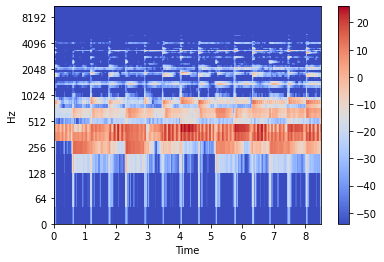

In [13]:
euph_stft = np.abs(librosa.stft(euph))
euph_mel = librosa.feature.melspectrogram(S=euph_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(euph_mel), x_axis='time', y_axis='log')
plt.colorbar()

new1 = librosa.amplitude_to_db(euph_mel)
new1 = split_mean(new1, 10)
print(new1.shape)
print(list(new1))

[-4.766949, -17.841888, -18.527386, -18.175179, -18.560328, -18.669563, -18.759048, -18.698229, -18.316658, -18.88602]


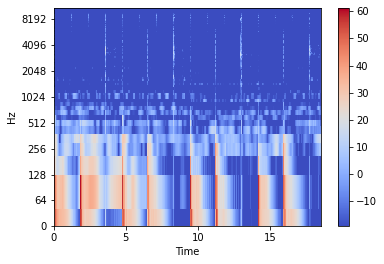

In [14]:
ff_stft = np.abs(librosa.stft(ff))
ff_mel = librosa.feature.melspectrogram(S=ff_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(ff_mel), x_axis='time', y_axis='log')
plt.colorbar()

new2 = librosa.amplitude_to_db(ff_mel)
new2 = split_mean(new2, 10)
print(list(new2))

[6.067162, -9.529871, -12.673098, -12.975988, -12.979932, -12.986694, -12.986694, -12.986694, -12.986694, -12.986694]


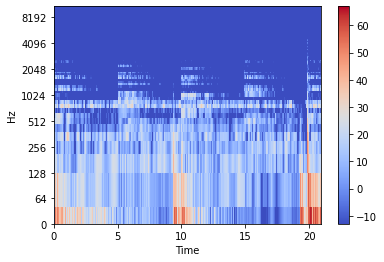

In [15]:
mmly_stft = np.abs(librosa.stft(mmly))
mmly_mel = librosa.feature.melspectrogram(S=mmly_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(mmly_mel), x_axis='time', y_axis='log')
plt.colorbar()

new3 = librosa.amplitude_to_db(mmly_mel)
new3 = split_mean(new3, 10)
print(list(new3))

[-2.965248, -28.555511, -41.62457, -43.056717, -43.359818, -43.50209, -43.519875, -43.519875, -43.519875, -43.51987]


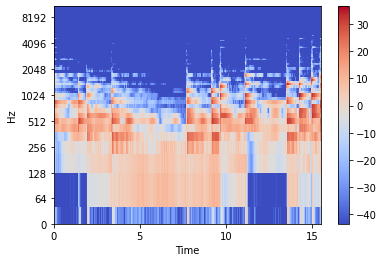

In [16]:
view_stft = np.abs(librosa.stft(view))
view_mel = librosa.feature.melspectrogram(S=view_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(view_mel), x_axis='time', y_axis='log')
plt.colorbar()

new4 = librosa.amplitude_to_db(view_mel)
new4 = split_mean(new4, 10)
print(list(new4))

### 5) Spectral Contrast

[12.010086813040315, 18.568504154789533, 21.031942550644395, 22.055820523001895, 23.80325530057765, 25.84637642318018, 23.259014977504993]


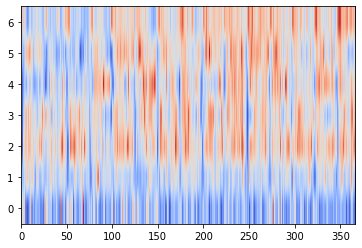

In [40]:
euph_cont = librosa.feature.spectral_contrast(euph, sr=sr)
plt.imshow(normalize(euph_cont, axis=1), aspect='auto', origin='lower', cmap='coolwarm')
euph_cont_data = split_mean(euph_cont,7)
print(list(euph_cont_data))

[13.664658106007915, 14.021587173856096, 17.505991754422503, 18.249293609136252, 18.275962245736117, 17.838121727036306, 38.024918521418385]


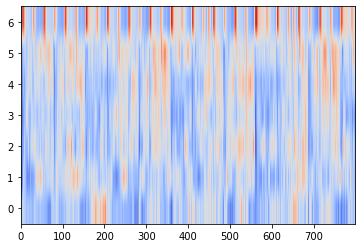

In [41]:
ff_cont = librosa.feature.spectral_contrast(ff, sr=sr)
plt.imshow(normalize(ff_cont, axis=1), aspect='auto', origin='lower', cmap='coolwarm')
ff_cont_data = split_mean(ff_cont,7)
print(list(ff_cont_data))

[12.9811516828926, 10.692684873452846, 19.109618875536583, 20.751713425013225, 19.85326894652001, 18.612927397708642, 29.512193613119127]


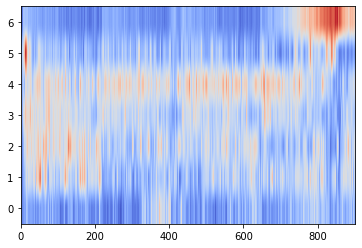

In [42]:
mmly_cont = librosa.feature.spectral_contrast(mmly, sr=sr)
plt.imshow(normalize(mmly_cont, axis=1), aspect='auto', origin='lower', cmap='coolwarm')
mmly_cont_data = split_mean(mmly_cont,7)
print(list(mmly_cont_data))

[16.65713330149345, 11.611707887208754, 17.73146601013138, 23.50406860415594, 20.107445808701154, 17.751967481765814, 26.26282387140969]


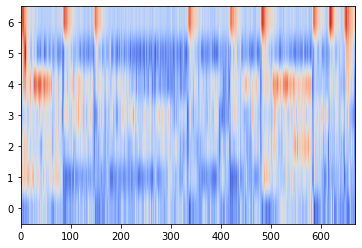

In [43]:
view_cont = librosa.feature.spectral_contrast(view, sr=sr)
plt.imshow(normalize(view_cont, axis=1), aspect='auto', origin='lower', cmap='coolwarm')
view_cont_data = split_mean(view_cont,7)
print(list(view_cont_data))

## 2. tempo features
### 1) global tempo

In [17]:
euph_tempo = librosa.beat.tempo(euph, sr=sr)
print(euph_tempo)
ff_tempo = librosa.beat.tempo(ff, sr=sr)
print(ff_tempo)
mmly_tempo = librosa.beat.tempo(mmly, sr=sr)
print(mmly_tempo)
view_tempo = librosa.beat.tempo(view, sr=sr)
print(view_tempo)

[105.46875]
[101.33272059]
[117.45383523]
[82.03125]


### 2) Novelty Function

Text(0.5, 1.0, 'Novelty Function')

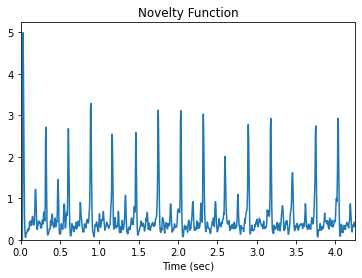

In [18]:
euph_onset_env = librosa.onset.onset_strength(euph, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(euph_onset_env))
euph_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(euph_t, euph_onset_env)
plt.xlim(0, euph_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

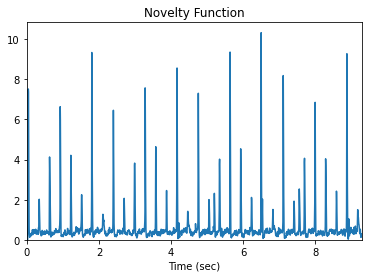

In [19]:
ff_onset_env = librosa.onset.onset_strength(ff, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(ff_onset_env))
ff_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(ff_t, ff_onset_env)
plt.xlim(0, ff_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

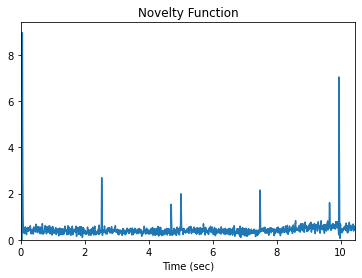

In [20]:
mmly_onset_env = librosa.onset.onset_strength(mmly, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(mmly_onset_env))
mmly_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(mmly_t, mmly_onset_env)
plt.xlim(0, mmly_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

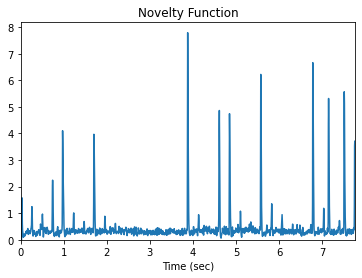

In [21]:
view_onset_env = librosa.onset.onset_strength(view, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(view_onset_env))
view_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(view_t, view_onset_env)
plt.xlim(0, view_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

### 3) Fourier Tempogram

[18.548603, 11.8961, 8.134007, 4.4801064, 2.8040686, 1.4647291, 1.1661602, 0.88499916, 0.7384039, 0.57658416]


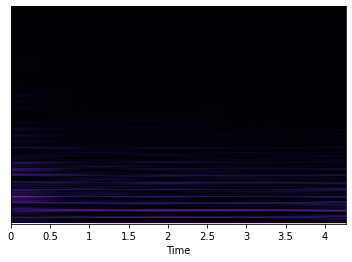

In [44]:
euph_S = librosa.stft(euph_onset_env, hop_length=1, n_fft=512)
euph_fourier_tempogram = np.absolute(euph_S)
librosa.display.specshow(euph_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
euph_ft_data = split_mean(euph_fourier_tempogram,10)
print(list(euph_ft_data))

[31.95773, 20.468573, 14.268254, 8.888675, 5.865718, 4.81107, 3.7673173, 3.0249321, 2.3684719, 2.1513307]


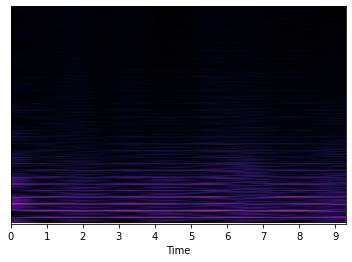

In [45]:
ff_S = librosa.stft(ff_onset_env, hop_length=1, n_fft=512)
ff_fourier_tempogram = np.absolute(ff_S)
librosa.display.specshow(ff_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
ff_ft_data = split_mean(ff_fourier_tempogram,10)
print(list(ff_ft_data))

[12.645065, 5.6874633, 4.318859, 2.9131536, 1.951718, 1.404991, 1.0961778, 0.8439766, 0.64722663, 0.5995504]


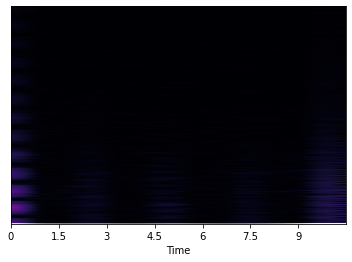

In [46]:
mmly_S = librosa.stft(mmly_onset_env, hop_length=1, n_fft=512)
mmly_fourier_tempogram = np.absolute(mmly_S)
librosa.display.specshow(mmly_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
mmly_ft_data = split_mean(mmly_fourier_tempogram,10)
print(list(mmly_ft_data))

[22.096376, 13.80662, 8.436085, 5.2247105, 3.4014957, 2.4603426, 1.8259778, 1.4498167, 1.1705097, 1.0637424]


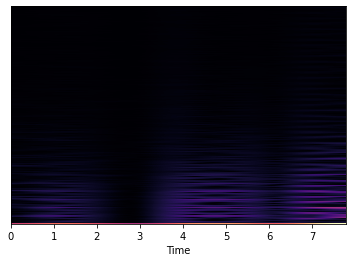

In [47]:
view_S = librosa.stft(view_onset_env, hop_length=1, n_fft=512)
view_fourier_tempogram = np.absolute(view_S)
librosa.display.specshow(view_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
view_ft_data = split_mean(view_fourier_tempogram,10)
print(list(view_ft_data))